#  Eigenvalues and Eigenvectors

Welcome to the last assignment of this Course. You will practice finding eigenvalues and eigenvectors for various linear transformations and use it in one of the applications.

**After this assignment you will be able to:**
- use Python to find eigenvalues and eigenvectors
- visualize and interpret eigenvalues and eigenvectos
- apply linear transformations, eigenvalues and eigenvectors in a webpage navigation model

# Table of Contents
- [ 1 - Eigenvalues and Eigenvectors: Definition and Interpretation](#1)
  - [ 1.1 - Definition of Eigenvalues and Eigenvectors](#1.1)
  - [ 1.2 - Finding Eigenvalues and Eigenvectors with Python](#1.2)
- [ 2 - Eigenvalues and Eigenvectors of the Standard Transformations in a Plane](#2)
  - [ 2.1 - Example 1: Reflection about y-axis (the vertical axis)](#2.1)
    - [ Exercise 1](#ex01)
  - [ 2.2 - Example 2: Shear in x-direction](#2.2)
    - [ Exercise 2](#ex02)
  - [ 2.3 - Example 3: Rotation](#2.3)
  - [ 2.4 - Example 4: Identity Matrix and Scaling in All Directions](#2.4)
  - [ 2.5 - Example 5: Projection onto x-axis](#2.5)
- [ 3 - Application of Eigenvalues and Eigenvectors: Navigating Webpages](#3)
  - [ Exercise 3](#ex03)
  - [ Exercise 4](#ex04)

## Packages

Run the following cell to load the packages you'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load the unit tests defined for this notebook.

In [2]:
import w4_unittest

<a name='1'></a>
## 1 - Eigenvalues and Eigenvectors: Definition and Interpretation

<a name='1.1'></a>
### 1.1 - Definition of Eigenvalues and Eigenvectors

Let's consider a linear transformation defined by matrix $A=\begin{bmatrix}2 & 3 \\ 2 & 1 \end{bmatrix}$. Apply this transformation to the standard basis vectors $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ and visualize the result (this was covered in details in the previous labs of this Course):

In [7]:
A = np.array([[2, 3],[2, 1]])
e1 = np.array([1 , 0])
e2 = np.array([0 , 1])

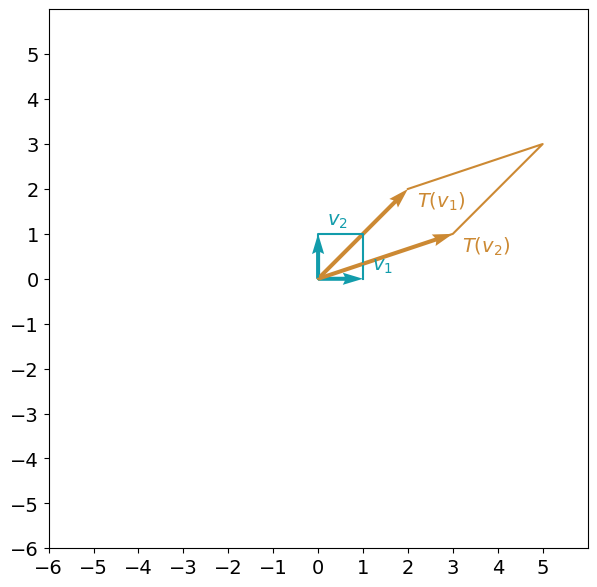

In [8]:
def plot_transformation(T,v1,v2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-6, 6))
    ax.set_yticks(np.arange(-6, 6))
    
    plt.axis([-6, 6, -6, 6])
    plt.quiver([0, 0],[0, 0], [v1[0], v2[0]], [v1[1], v2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2[0],v1[0]+v2[0],v1[0]], 
        [0,v2[1],v1[1]+v2[1],v1[1]], 
        color=color_original)
    v1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1)])
    ax.text(v1[0]-0.2+v1_sgn[0], v1[1]-0.2+v1_sgn[1], f'$v_1$', fontsize=14, color=color_original)
    v2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v2)])
    ax.text(v2[0]-0.2+v2_sgn[0], v2[1]-0.2+v2_sgn[1], f'$v_2$', fontsize=14, color=color_original)
    
    v1_transformed = T @ v1
    v2_transformed = T @ v2
    
    plt.quiver([0, 0],[0, 0], [v1_transformed[0], v2_transformed[0]], [v1_transformed[1], v2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2_transformed[0],v1_transformed[0]+v2_transformed[0],v1_transformed[0]], 
             [0,v2_transformed[1],v1_transformed[1]+v2_transformed[1],v1_transformed[1]], 
             color=color_transformed)
    v1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1_transformed)])
    ax.text(v1_transformed[0]-0.2+v1_transformed_sgn[0], v1_transformed[1]-v1_transformed_sgn[1], 
            f'$T(v_1)$', fontsize=14, color=color_transformed)
    v2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v2_transformed)])
    ax.text(v2_transformed[0]-0.2+v2_transformed_sgn[0], v2_transformed[1]-v2_transformed_sgn[1], 
            f'$T(v_2)$', fontsize=14, color=color_transformed)
    
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(A, e1, e2)

Both of the original basis vectors $e_1$ and $e_2$ (shown as $v_1$ and $v_2$ on the plot) changed their length and direction with the transformation $A$. What if you can choose some other basis vectors, where only their length will change? For the vector $v$, its transformation will be $Av=\lambda v$. Vector $v$ will be called **eigenvector** and scaling factor $\lambda$ will be called **eigenvalue**.

Note, that if $v$ is an eigenvector, so that $Av = \lambda v$, then any vector $kv$ ($k\in\mathbb{R}, k\neq 0$) is also an eigenvector with the same eigenvalue: $A(kv)=k(Av)=k \lambda v = \lambda (kv)$. Geometrically, in $\mathbb{R}^2$ this means that there are infinitely many eigenvectors corresponding to one eigenvalue, they are on the same straight line. And usually just one can be chosen as an eigenvector. 

<a name='1.2'></a>
### 1.2 - Finding Eigenvalues and Eigenvectors with Python

In Python eigenvalues and eigenvectors can be found using the `NumPy` function `np.linalg.eig()`. It returns a tuple consisting of a vector and an array. The vector contains the eigenvalues. The array contains the corresponding eigenvectors, one eigenvector per column. The eigenvectors chosen are the normalized ones, so their norms are 1.

With the following code you can find an eigenvalues and eigenvectors for the previously defined matrix $A$:

In [9]:
A_eig = np.linalg.eig(A)

print("Matrix A:\n", A, "\n\n Eigenvalues and eigenvectors of matrix A:\n", A_eig)

Matrix A:
 [[2 3]
 [2 1]] 

 Eigenvalues and eigenvectors of matrix A:
 EigResult(eigenvalues=array([ 4., -1.]), eigenvectors=array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))


First eigenvector can be extracted with the code `A_eig[1][:,0]` and second eigenvector with the code `A_eig[1][:,1]`. Let's visualize the result of the transformation:

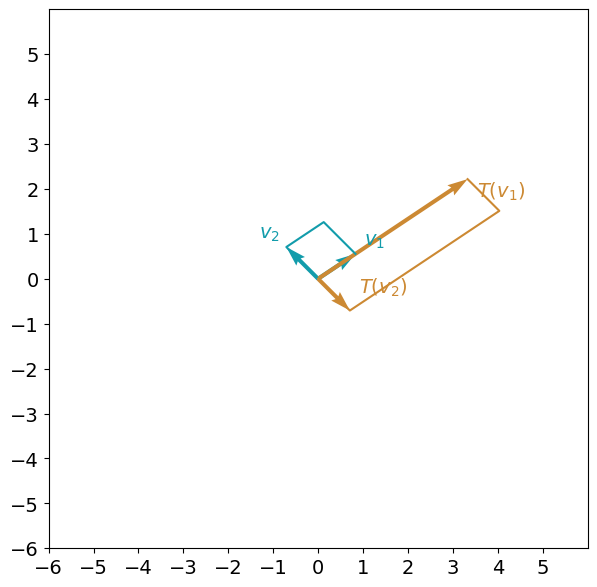

In [10]:
plot_transformation(A, A_eig[1][:,0], A_eig[1][:,1])

You can see that now that this linear transformation can be interpreted as a stretch in the direction of the eigenvector $v_1$ and change of the direction for the vector $v_2$.

<a name='2'></a>
## 2 - Eigenvalues and Eigenvectors of the Standard Transformations in a Plane


<a name='2.1'></a>
### 2.1 - Example 1: Reflection about y-axis (the vertical axis)

<a name='ex01'></a>
### Exercise 1

Complete matrix `A_reflection_yaxis`, which corresponds to the reflection about y-axis, and find its eigenvalues and eigenvectors. Visualize the result and investigate it. How would you interpret this linear transformation in terms of the eigenvectors and thier eigenvalues?

Matrix A_reflection_yaxis:
 [[-1  0]
 [ 0  1]] 

 Eigenvalues and eigenvectors of matrix A_reflection_yaxis:
 EigResult(eigenvalues=array([-1.,  1.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


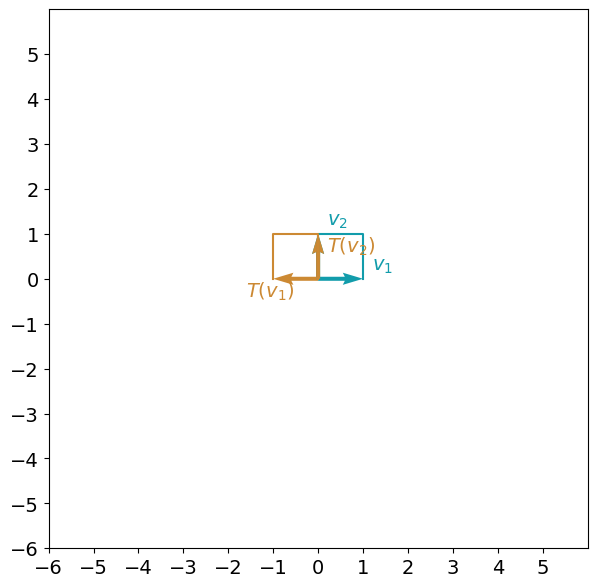

In [11]:
### START CODE HERE ###
# Define transformation matrix A_reflection_yaxis as a numpy array.
A_reflection_yaxis = np.array([[-1 , 0] , [0 , 1]])
# Find eigenvalues and eigenvectors or matrix A_reflection_yaxis.
A_reflection_yaxis_eig = np.linalg.eig(A_reflection_yaxis)
### END CODE HERE ###

print("Matrix A_reflection_yaxis:\n", A_reflection_yaxis, 
      "\n\n Eigenvalues and eigenvectors of matrix A_reflection_yaxis:\n", A_reflection_yaxis_eig)
plot_transformation(A_reflection_yaxis, A_reflection_yaxis_eig[1][:,0], A_reflection_yaxis_eig[1][:,1])

In [13]:
# Test your solution.
w4_unittest.test_A_reflection_yaxis(A_reflection_yaxis, A_reflection_yaxis_eig)

 All tests passed


It would be a natural question to ask, is it always possible to find two different eigenvectors for any linear transformation in $\mathbb{R}^2$? Well, unfortunately not. You can see the following example.

<a name='2.2'></a>
### 2.2 - Example 2: Shear in x-direction

<a name='ex02'></a>
### Exercise 2

Complete matrix `A_shear_x`, which corresponds to the shear in x-direction with a scalar $0.5$. It can be visualized as: 

<img src = "images/shear_transformation.png" width="400" align="center"/>

Find eigenvalues and eigenvectors of matrix `A_shear_x`. Visualize the transformation applied to the found eigenvectors.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    Vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ will remain the same, and vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ will transform into a vector $\begin{bmatrix}0.5 \\ 1\end{bmatrix}$.
</ul>
</p>

Matrix A_shear_x:
 [[1.  0.5]
 [0.  1. ]] 

 Eigenvalues and eigenvectors of matrix A_shear_x:
 EigResult(eigenvalues=array([1., 1.]), eigenvectors=array([[ 1.0000000e+00, -1.0000000e+00],
       [ 0.0000000e+00,  4.4408921e-16]]))


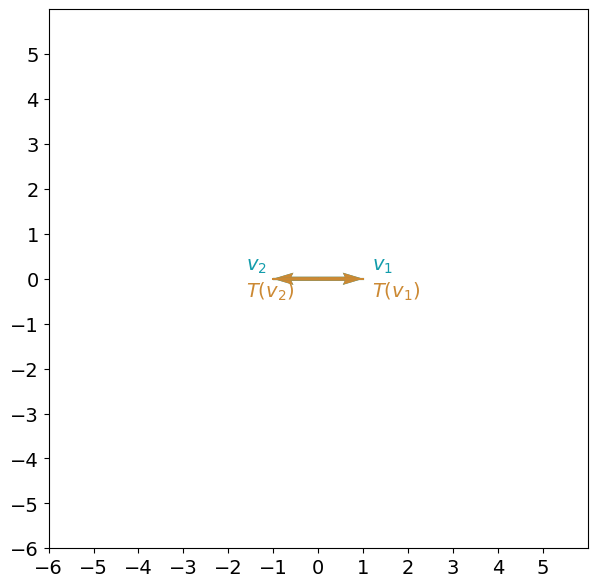

In [14]:
### START CODE HERE ###
# Define transformation matrix A_shear_x as a numpy array.
A_shear_x = np.array([[1 , 0.5] , [0 , 1]])
# Find eigenvalues and eigenvectors or matrix A_reflection_yaxis.
A_shear_x_eig = np.linalg.eig(A_shear_x)
### END CODE HERE ###

print("Matrix A_shear_x:\n", A_shear_x, 
      "\n\n Eigenvalues and eigenvectors of matrix A_shear_x:\n", A_shear_x_eig)
plot_transformation(A_shear_x, A_shear_x_eig[1][:,0], A_shear_x_eig[1][:,1])

In [15]:
# Test your solution.
w4_unittest.test_A_shear_x(A_shear_x, A_shear_x_eig)

 All tests passed


There are two eigenvalues $\lambda  =1$, that are equal to each other. Thus, shear transformation has only one eigenvector. Here there is no change in the x-direction, and any other vector outside of the $Ox$ line will be sheared, so they cannot be eigenvectors. This is an example of $2 \times 2$ matrix with only one eigenvector.

Now you might have asked yourself, are there any linear transformations in $\mathbb{R}^2$ with no eigenvectors?

<a name='2.3'></a>
### 2.3 - Example 3: Rotation

Rotation by $90$ degrees clockwise can be defined by matrix $A_{rotation}=\begin{bmatrix}0 & 1 \\ -1 & 0 \end{bmatrix}$. Find its eigenvalues and eigenvectors:

In [16]:
A_rotation = np.array([[0, 1],[-1, 0]])
A_rotation_eig = np.linalg.eig(A_rotation)

print("Matrix A_rotation:\n", A_rotation, 
      "\n\n Eigenvalues and eigenvectors of matrix A_rotation:\n", A_rotation_eig)

Matrix A_rotation:
 [[ 0  1]
 [-1  0]] 

 Eigenvalues and eigenvectors of matrix A_rotation:
 EigResult(eigenvalues=array([0.+1.j, 0.-1.j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]]))


There are two eigenvalues in the output, but they are actually complex numbers. So, there are no *real* eigenvalues ($\lambda\notin\mathbb{R}$), which means there will be no vectors that will keep their direction with this transformation. This makes sense for the rotation 90 degress, doesn't it?

<a name='2.4'></a>
### 2.4 - Example 4: Identity Matrix and Scaling in All Directions

Now you can investigate some other examples. What if you take identity matrix? This means that there will be no change to any vector in the plane - all of the vectors can be considered as eigenvectors.

In [17]:
A_identity = np.array([[1, 0],[0, 1]])
A_identity_eig = np.linalg.eig(A_identity)

print("Matrix A_identity:\n", A_identity, 
      "\n\n Eigenvalues and eigenvectors of matrix A_identity:\n", A_identity_eig)

Matrix A_identity:
 [[1 0]
 [0 1]] 

 Eigenvalues and eigenvectors of matrix A_identity:
 EigResult(eigenvalues=array([1., 1.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


The out of the `np.linalg.eig()` function shows that there are two eigenvalues that are equal to each other $\lambda = 1$, which is true. But the list of eigenvectors does not cover all of them. It can be show algebraically that all of the vectors will be eigenvectors for identity matrix. Using software, you can't see it sometimes - be careful! That's why understanding of mathematical objects behind your codes and models is so important.

Check that the same will happen finding eigenvectors for the scaling (dilation) in both directions x and y by factor $2$:

In [18]:
A_scaling = np.array([[2, 0],[0, 2]])
A_scaling_eig = np.linalg.eig(A_scaling)

print("Matrix A_scaling:\n", A_scaling, 
      "\n\n Eigenvalues and eigenvectors of matrix A_scaling:\n", A_scaling_eig)

Matrix A_scaling:
 [[2 0]
 [0 2]] 

 Eigenvalues and eigenvectors of matrix A_scaling:
 EigResult(eigenvalues=array([2., 2.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


<a name='2.5'></a>
### 2.5 - Example 5: Projection onto x-axis

You can investigate some more interesting examples, e.g. projection onto x-axis $A_{projection}=\begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}$ has two real eigenvalues, and one of them is equal to $0$. There is nothing wrong with it, $\lambda$ can be equal to $0$! The transformation still has two eigenvectors.

In [19]:
A_projection = np.array([[1, 0],[0, 0]])
A_projection_eig = np.linalg.eig(A_projection)

print("Matrix A_projection:\n", A_projection, 
      "\n\n Eigenvalues and eigenvectors of matrix A_projection:\n", A_projection_eig)

Matrix A_projection:
 [[1 0]
 [0 0]] 

 Eigenvalues and eigenvectors of matrix A_projection:
 EigResult(eigenvalues=array([1., 0.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


Now you know how to find eigenvalues and eigenvectors. Let's have a look at one of their applications.

<a name='3'></a>
## 3 - Application of Eigenvalues and Eigenvectors: Navigating Webpages

Multiple components describing some structure can be organized as a single vector. If the state of the structure is changing in time due to some process, the vector is referred as a **state vector**. Such dynamic processes are often modeled at discrete times calculating the state vector as a linear transformation of a previous state vector. This model is called a **discrete dynamical system**. 

Starting with an initial state $X_0$, the transition to the next state $X_1$ is a linear transformation defined with a matrix $P$: $X_1=PX_0$. That leads to $X_2=PX_1=P^2X_0$, $X_3=P^3X_0$, and so on. This implies that $X_t=PX_{t-1}$ for $t=0,1,2,3,\ldots$.

A discrete dynamical system can be used to model browsing web pages. Web pages often contain links to other pages, for simplicity assume that the browser is only following links to a new page rather than navigating to an unlinked one. 

Let the probabilities that the browser is on a particular page at time $t$ be a state vector $X_t$. Navigation from one page to another advances the model from one state vector $X_{t-1}$ to another state vector $X_t$. A linear transformation, defined by a matrix $P$, will have entries $a_{ij}$ with the probabilities that the browser navigates to page $i$ from page $j$. For fixed column $j$, the entries represent a probability distribution describing location of the browser at the next step. Thus, the entries in each column must add to one.

<a name='ex03'></a>
### Exercise 3

Set matrix $P$ for a small number of pages $n=5$. All elements on the main diagonal should be equal to $0$, and the entries in each column must add to one. Here is an example of such a matrix for $n=4$:

$$P=
\begin{bmatrix}
0 & 0.75 & 0.35 & 0.85 \\
0.15 & 0 & 0.35 & 0.05 \\
0.30 & 0.20 & 0 & 0.1 \\
0.55 & 0.05 & 0.30 & 0
\end{bmatrix}\tag{5}
$$

Define vector $X_0$, so the browser starts navigation at page $4$ ($X_0$ is a vector with a single entry equal to one, and all other entries equal to zero). Apply the transformation once: $X_1=PX_0$ to find a vector of the probabilities that the browser is at each of five pages.

In [20]:
### START CODE HERE ###
# Based on the example above for n=4 define matrix P for n=5, 
# such that all elements on the main diagonal should be equal to 0, 
# and the entries in each column must add to one.
P = np.array([    
    [0.00, 0.25, 0.25, 0.25, 0.25],
    [0.25, 0.00, 0.25, 0.25, 0.25],
    [0.25, 0.25, 0.00, 0.25, 0.25],
    [0.25, 0.25, 0.25, 0.00, 0.25],
    [0.25, 0.25, 0.25, 0.25, 0.00]
]) 
X0 = np.array([[0], [0], [0], [1], [0]])
# Multiply matrix P and X_0 (matrix multiplication).
X1 = P @ X0

### END CODE HERE ###
print(sum(P))

[1. 1. 1. 1. 1.]


##### __Expected Output__

```Python
[1. 1. 1. 1. 1.]
```

In [21]:
# Test your solution.
w4_unittest.test_matrix(P, X0, X1)

 All tests passed


Applying the transformation $m$ times you can find a vector $X_m$ with the probabilities of the browser being at each of the pages after $m$ steps of navigation.

In [22]:
X = np.array([[0],[0],[0],[1],[0]])
m = 20

for t in range(m):
    X = P @ X
    
print(X)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


It is interesting to predict the probabilities in $X_m$ when $m$ is large, and thus determining what pages a browser are more likely to visit after this sort of random navigation. To do that you have to apply the transformation many times, and in real life problems this will be computationally expensive. Eigenvalues and eigenvectos can help here significantly reducing the amount of calculations. 

Try to find eigenvalues and eigenvectors for the previously defined matrix $P$:

In [23]:
np.linalg.eig(P)

EigResult(eigenvalues=array([-0.25,  1.  , -0.25, -0.25, -0.25]), eigenvectors=array([[-0.89442719,  0.4472136 ,  0.19518001,  0.15432036,  0.09319422],
       [ 0.2236068 ,  0.4472136 , -0.53674504,  0.73302172, -0.25628411],
       [ 0.2236068 ,  0.4472136 ,  0.76445506,  0.04715344, -0.25628411],
       [ 0.2236068 ,  0.4472136 , -0.21144502, -0.46724776, -0.41160781],
       [ 0.2236068 ,  0.4472136 , -0.21144502, -0.46724776,  0.8309818 ]]))

A square matrix is called a **Markov matrix** if all entries are nonnegative and the sum of each column elements is equal to $1$. Markov matrices have a handy property - they always have an eigenvalue equals to 1. 

Matrix $P$ was defined in such a way, that it is actually a Markov matrix, and you can see that it has an eigenvalue $1$. The equation $X_m=PX_{m-1}$ can be rewritten as $PX_{m-1}=1\times X_m$. Predicting probabilities in $X_m$ when $m$ is large you can actually look for an eigenvector corresponding to the eigenvalue $1$, because then you will get $PX = X$.

In [24]:
X_inf = np.linalg.eig(P)[1][:,0]

print("Eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))

Eigenvector corresponding to the eigenvalue 1:
[-0.89442719  0.2236068   0.2236068   0.2236068   0.2236068 ]


<a name='ex04'></a>
### Exercise 4

Perform matrix multiplication $PX$ (multiply matrix `P` and vector `X_inf`) to check that the result will be equal to the vector $X$ (`X_inf`).

In [25]:
# This is organised as a function only for grading purposes.
def check_eigenvector(P, X_inf):
    ### START CODE HERE ###
    X_check = P @ X_inf
    ### END CODE HERE ###
    
    return X_check

X_check = check_eigenvector(P, X_inf)

print("Original eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))
print("Result of multiplication:" + str(X_check))

# Function np.isclose compares two NumPy arrays element by element, allowing for error tolerance (rtol parameter).
print("Check that PX=X element by element:" +str(np.isclose(X_inf, X_check, rtol=1e-10)))

Original eigenvector corresponding to the eigenvalue 1:
[-0.89442719  0.2236068   0.2236068   0.2236068   0.2236068 ]
Result of multiplication:[ 0.2236068 -0.0559017 -0.0559017 -0.0559017 -0.0559017]
Check that PX=X element by element:[False False False False False]


In [26]:
# Test your solution.
w4_unittest.test_check_eigenvector(check_eigenvector)

 All tests passed


The output eigenvectors of the `np.linalg.eig()` function are normalized so that their norm is $1$. For the vector $X$ you would like to choose a vector in the same direction, so that the sum of its elements is equal to $1$:

In [27]:
X_inf = X_inf / sum(X_inf)

print("Probabilities being at each of the pages:\n" + str(X_inf))

Probabilities being at each of the pages:
[ 1.61125679e+16 -4.02814196e+15 -4.02814196e+15 -4.02814196e+15
 -4.02814196e+15]


You can see the probabilities of the browser being at each of the pages after infinite steps of navigation. Such type of a model was the foundation of the PageRank algorithm, which is the basis of Google's very successful search engine.

Congratulations! You have finished the assignment in this week.